## Predicting heart disease using machine learning:
this model is capable of predicting wheter or not a person has heart disease based on their medical attributes.
we're going to take following approach:
* 1.problem definition
* 2.data
* 3.Evaluation
* 4.features
* 5.modeling
* 6.experimentation

## Problem definition:
in a statement.
> Given clinical parameters about a patient, Can we predict wheter or not a person has heart disease?

## Data:
the original data came from the Cleavland data from UCI machine learning repository. <br>https://archive.ics.uci.edu/dataset/45/heart+disease<br>
 
there is also a version of it available onn kaggle . <br>
https://www.kaggle.com/datasets/thisishusseinali/uci-heart-disease-data<br>

## Evaluation:
> If we can reach 90% accuracy at predicting wheter or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features:
**data dictionary:**
1. age - age in years
2. sex - (1 = male; 0 = female)
3.  cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* * can range from mild symptoms to severe problems
* * signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
* unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.



## Preparing Required Tools:
* Pandas
* Numpy
* Scikit-learn
* Matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 #because we want our plots to be shown in the notebook
%matplotlib inline

#Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")

#df
df.shape

(303, 14)

## Data Exploration(EDA)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# finding out how how many of each classes there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

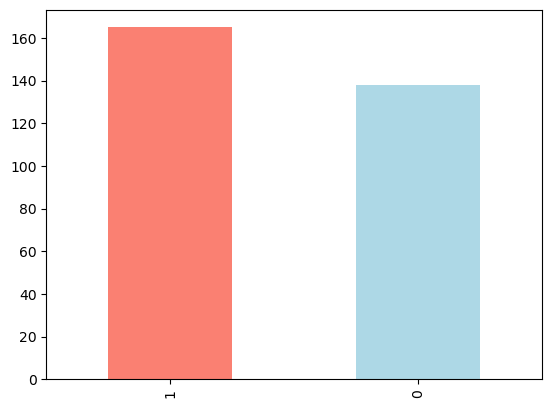

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind= "bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency with Sex")
plt.xlabel("0 = No disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)


In [ ]:
df.thalach.value_counts()

## Age vs Max Heart Rate for Heart Disease

In [ ]:
plt.figure(figsize=[10,6])

# scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c = "salmon"
           )

#Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c = "lightblue"
           )
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# checking the distribution of the age column with histogram
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type
#### cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp , df.target)


In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color= ["salmon","lightblue"], figsize=(10,6));
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [ ]:
# Make a correlation matrix
df.corr()

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix ,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5 , top- 0.5)

## Modeling

In [ ]:
 # Split Data into X and Y
x = df.drop("target", axis=1)

y = df["target"]

In [ ]:
x


In [ ]:
y

In [ ]:
# split data into train and test test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [ ]:
y_train , len(y_train)

#### Trying out 3 different machine learning models:
1. Logistic Regression
2. K_Nearest Neighbours Classifier
3. Random Forest Classifier

In [ ]:
# putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()
         }
# Create a function to fit and score models
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of scikit_learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test: test labels
    """
    #Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores ={}
    # loop through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train,y_train)
        #evaluating the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
    

In [ ]:
model_scores = fit_score(models=models, x_train= x_train, x_test= x_test, y_train= y_train, y_test= y_test)
model_scores

### Model Comparison

In [ ]:
model_compare = pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation = 0);

Let's look at the folowing:
* Hyperparameter tuning 
* Feature importance 
* Confusion matrix 
* Cross-validation 
* Precision
* Recall
* F1 score 
* Classification report 
* ROC Curve
* Area Under Curve (AUC) 

### Hyperparameter Tuning

In [ ]:
#Tuning KNN
train_scores = []
test_scores = []

#create a list of different values of n_neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

#loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    #updating the train scores list
    train_scores.append(knn.score(x_train, y_train))
    
    #updating the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [ ]:
train_scores 


In [ ]:
test_scores 

In [ ]:
plt.plot(neighbors, train_scores, label= "Train scores"  )
plt.plot(neighbors, test_scores, label= "Test scores"  )
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"Maximum KNN score on the test data is {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
Log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}
# Create a hyperparameter grid for RandomForest

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
           
          "min_samples_leaf": np.arange(1,20,2)}


In [ ]:
np.logspace(-4, 4, 20)

In [ ]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions = Log_reg_grid,
                              cv= 5,
                              n_iter=20,
                              verbose= True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(x_test, y_test)

In [ ]:
# Tune RandomForestClassifier
np.random.seed(42)
# rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = rf_grid,
                              cv= 5,
                              n_iter=20,
                              verbose= True)
#Fit random hyperparameter search model for RandomForestClassifier
# rs_rf.fit(x_train, y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test, y_test)

# Hyperparameter Tuning with GridSearchCV


In [ ]:
# Different Hyperparameters for LogsiticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

In [ ]:
# Check the best parameters
gs_log_reg.best_params_

In [ ]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

# Evaluating a classification model, beyond accuracy 
Now we've got a tuned model, let's get some of the metrics we discussed before.</br>
</br>
We want:

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

We'll make predictions on the test data.

In [ ]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay 

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);


In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

In [ ]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

In [ ]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# Feature importance

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
 pd.crosstab(df["sex"], df["target"])

In [ ]:
pd.crosstab(df["slope"], df["target"])

we can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

0. : Upsloping: better heart rate with excercise (uncommon)
1. : Flatsloping: minimal change (typical healthy heart)
2. : Downslopins: signs of unhealthy heart
According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.



When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.